### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [135]:
data = pd.read_csv('data/coupons.csv')
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


2. Investigate the dataset for missing or problematic data.

In [136]:
# check for each column the value counts so to understand how the data is and if there is any issue.
for dest in data.columns:
    print(data[dest].value_counts())

destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64
passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64
weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64
temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64
time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64
expiration
1d    7091
2h    5593
Name: count, dtype: int64
gender
Female    6511
Male      6173
Name: count, dtype: int64
age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64
maritalStatus
Married partner      5100
Single               4752
Unmarri

3. Decide what to do about your missing data -- drop, replace, other...

In [137]:
data.rename(columns ={"passanger" : "passenger"}) # rename passanger column to passenger
data.loc[:, 'age'] = data['age'].str.replace("below21", "20") # we convert age to number hence update value to an integer
data.loc[:, 'age'] = data['age'].str.replace("50plus", "50") # we convert age to number hence update value to an integer
data.loc[:, 'age'] = data['age'].astype(int) # convert age column to integer

In [138]:
# drop the duplicates
data.drop_duplicates()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


**Check the NaN values in the table and drop them if needed.**

In [139]:
# find nan counts and replace them with some value
data['car'] = data['car'].fillna("no car data available")

nan_counts = data.isna().sum()
print(nan_counts)

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
car                       0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64


In [140]:
# drop the rows where the data not available for bar, CoffeeHouse etc.
data = data.dropna()
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon?



In [141]:
# find the percentage of users who have accepted the coupon
accepted = data[data['Y'] == 1].shape[0]
rejected = data[data['Y'] == 0].shape[0]
perc_accepted = round((accepted / (accepted + rejected)) * 100)

print("\033[1mResults:\033[0m")
print(f"The total proportion of the drivers accepting the Coupon is {perc_accepted}%.")

Results:
The total proportion of the drivers accepting the Coupon is 57%.


5. Use a bar plot to visualize the `coupon` column.

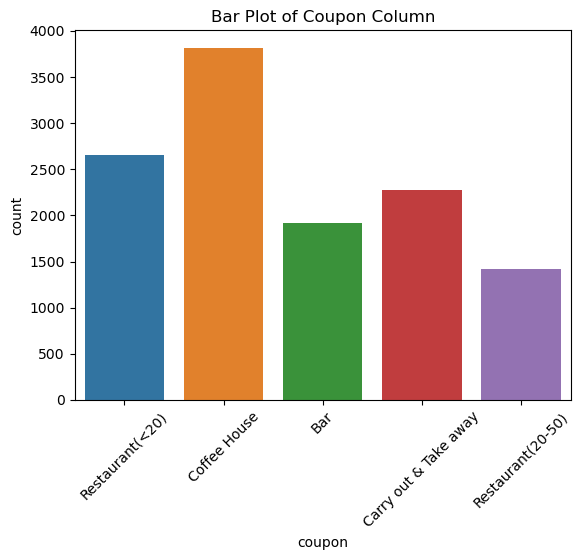

In [142]:
sns.countplot(x='coupon', data=data, hue='coupon', legend=False)
plt.title('Bar Plot of Coupon Column')
plt.xticks(rotation=45)
plt.savefig('images/bar_plot_coupon.png', bbox_inches='tight')  # bbox_inches avoids label cutoff
plt.show()

6. Use a histogram to visualize the temperature column.

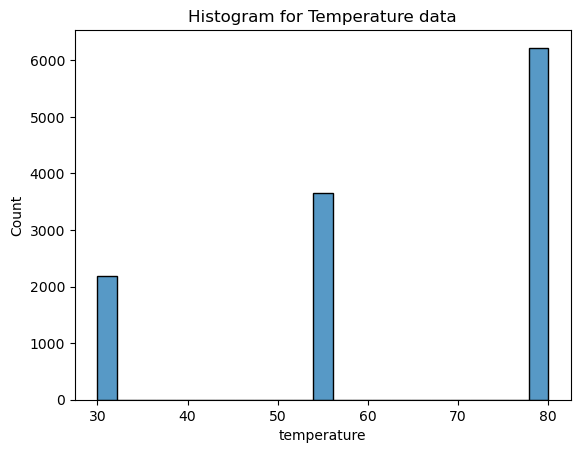

In [143]:
sns.histplot(data=data, x="temperature")
plt.title('Histogram for Temperature data')
plt.savefig('images/hist_temperature.png', bbox_inches='tight')  # bbox_inches avoids label cutoff
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [144]:
df_bar_coupons = data.query('coupon == "Bar" and Y == 1') # coupon column value should be Bar and Y is for accepting the coupon

2. What proportion of bar coupons were accepted?


In [145]:
coupons_accepted_df = data.query("Y == 1") # find the total coupons accepted for all types

bar_coupons_accepted = round((df_bar_coupons.shape[0] / coupons_accepted_df.shape[0]) * 100)

print("\033[1mResults:\033[0m")
print(f"The total proportion of the bar coupons accepted are {bar_coupons_accepted}%.")

Results:
The total proportion of the bar coupons accepted are 11%.


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [146]:
less_than_3 = ["1~3", "less1"] # list of values where they went to bar less than 3 times
greater_than_3 = ["4~8", "gt8"] # list of values where they went to bar more than 3 times

count_bar_lessthan3 = df_bar_coupons.query('Bar in @less_than_3').shape[0]
count_bar_greaterthan3 = df_bar_coupons.query('Bar in @greater_than_3').shape[0]

# get the count and then calculate percentage and finally round it
bar_accep_rate = round(( count_bar_lessthan3
                        / (count_bar_lessthan3 + count_bar_greaterthan3)) * 100)

print("\033[1mResults:\033[0m")
print(f"{count_bar_lessthan3} drivers accepted coupons who went to bar less than 3 times.")
print(f"{count_bar_greaterthan3} drivers accepted coupons who went to bar more than 3 times.")
print(f"The acceptance rate between those who went to a bar 3 or fewer times a month to those who went more is {bar_accep_rate}%.")
print(f"Drivers going to bar less were accepting coupons more.")

Results:
492 drivers accepted coupons who went to bar less than 3 times.
147 drivers accepted coupons who went to bar more than 3 times.
The acceptance rate between those who went to a bar 3 or fewer times a month to those who went more is 77%.
Drivers going to bar less were accepting coupons more.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [147]:
greater_than_1 = ["1~3", "4~8", "gt8"] # drivers going to bar more than once per month

count_bar_greaterthan1 = df_bar_coupons.query('Bar in @greater_than_1' 
                                        and 'age > 25').shape[0]
count_accepted_coupons = coupons_accepted_df.shape[0]
drivers_4 = round((count_bar_greaterthan1 / count_accepted_coupons) * 100)

print("\033[1mResults:\033[0m")
print(f"{count_bar_greaterthan1} drivers who accepted coupons for bar went to bar more than once per month and are over age of 25.")
print(f"{count_accepted_coupons} total drivers accepted the coupon for bar.")
print(f"{drivers_4}% of drivers who accepted coupons for bar went to bar more than once per month and are over age of 25.")

Results:
554 drivers who accepted coupons for bar went to bar more than once per month and are over age of 25.
6877 total drivers accepted the coupon for bar.
8% of drivers who accepted coupons for bar went to bar more than once per month and are over age of 25.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [148]:
passenger_not_kid = ["Friend(s)", "Partner"] # passenger who are not kid
occupations_other = ["Farming Fishing & Forestry"] # occupation of Farming Fishing & Forestry

drivers_5 = round((df_bar_coupons.query('Bar in @greater_than_1' 
                                        and 'passenger in @passenger_not_kid' 
                                        and 'occupation not in @occupations_other').shape[0] / count_accepted_coupons) * 100)

print("\033[1mResults:\033[0m")
print(f"{drivers_5}% drivers accepted coupon who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.")


Results:
11% drivers accepted coupon who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [149]:
marital_status_widowed = ["Widowed"]
cheap_restaurants = ["4~8", "gt8"] # cheap restaurants with more than 4 times a month
income_less_50k = ["$25000 - $37499", "$12500 - $24999", "$37500 - $49999"] #  income is less than 50K

count1 = df_bar_coupons.query(('Bar in @greater_than_1' 
                                        and 'passenger in @passenger_not_kid' 
                                        and 'maritalStatus not in @marital_status_widowed')).shape[0]

count2 = df_bar_coupons.query(('Bar in @greater_than_1'
                                          and 'age < 30')).shape[0]

count3 = data.query(('RestaurantLessThan20 in @cheap_restaurants'
                                          and 'income in @income_less_50k')).shape[0]

count4 = count1 + count2 + count3 # count all the drivers who accepted coupon

drivers6 = round((count4 / count_accepted_coupons) * 100) # find percentage out of all the drivers accepted the coupon

print("\033[1mResults:\033[0m")
print(f"{count1} drivers who accepted the coupon go to bars more than once a month, had passengers that were not a kid, and were not widowed.")
print(f"{count2} drivers who accepted the coupon go to bars more than once a month and are under the age of 30.")
print(f"{count3} drivers who accepted the coupon go to cheap restaurants more than 4 times a month and income is less than 50K.")
print(f"{drivers6}% drivers accepted coupon with above listed conditions.")
print(f"\033[1mAll above conditions makes the majority of the drivers accepting the coupons.\033[0m")

Results:
781 drivers who accepted the coupon go to bars more than once a month, had passengers that were not a kid, and were not widowed.
413 drivers who accepted the coupon go to bars more than once a month and are under the age of 30.
5336 drivers who accepted the coupon go to cheap restaurants more than 4 times a month and income is less than 50K.
95% drivers accepted coupon with above listed conditions.
All above conditions makes the majority of the drivers accepting the coupons.


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [150]:
print("\033[1mHypothesize:\033[0m")
print('Drivers who are driving with Friends or partner under the age of 30 with lower income grade who goes to cheaper restaurant are likely to accept the coupons.')

Hypothesize:
Drivers who are driving with Friends or partner under the age of 30 with lower income grade who goes to cheaper restaurant are likely to accept the coupons.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Identity the income of drivers accepting coupon for cheaper restaurant. Which group accepts the most?**

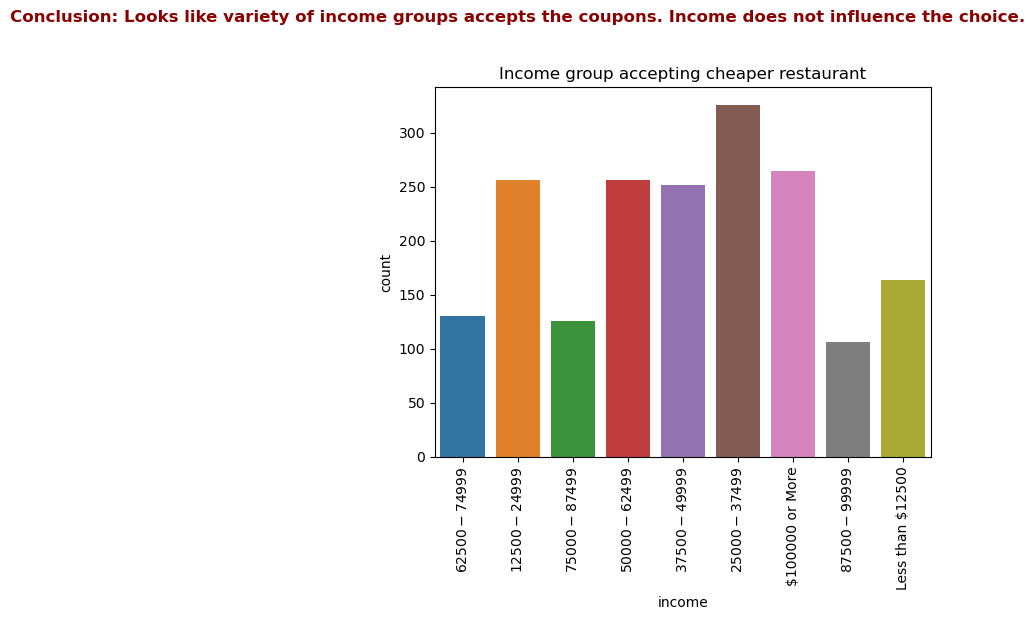

In [151]:
print(f"\033[1m\033[0m")
df_rest_under20_coupons = data.query('coupon == "Restaurant(<20)" and Y == 1')
sns.countplot(x='income', data=df_rest_under20_coupons, hue='income', legend=False)
plt.title('Income group accepting cheaper restaurant')
plt.xticks(rotation=90)
plt.savefig('images/bar_plot_rest_under20_income.png', bbox_inches='tight')  # bbox_inches avoids label cutoff
plt.text(
    x=1,                # x-coordinate (index of bar or numeric position)
    y=400,              # y-coordinate (height position)
    s="Conclusion: Looks like variety of income groups accepts the coupons. Income does not influence the choice.",  # your conclusion
    fontsize=12,
    fontweight='bold',
    color='darkred',
    ha='center',        # horizontal alignment: left, right, or center
    va='bottom'         # vertical alignment
)
plt.show()


**Identity the education of drivers accepting coupon for expensive restaurant. Which group accepts the most?**

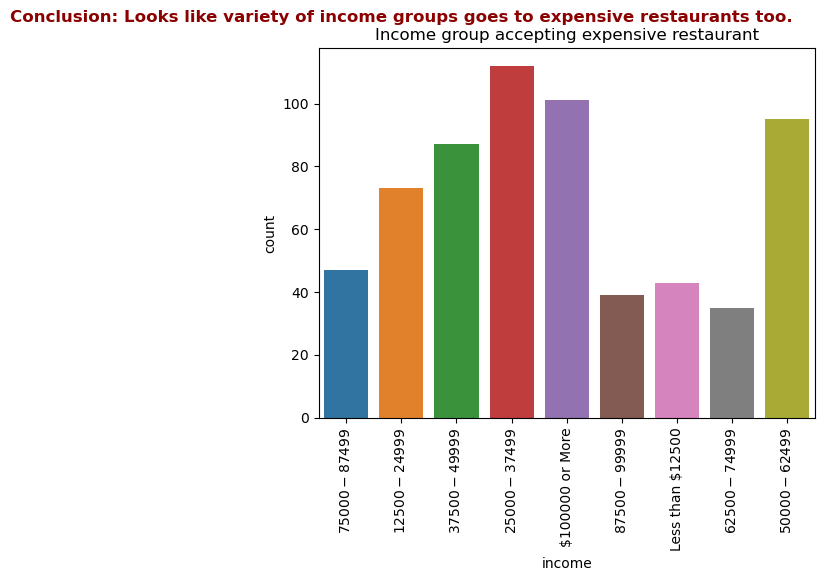

In [152]:
df_rest_2050_coupons = data.query('coupon == "Restaurant(20-50)" and Y == 1')
sns.countplot(x='income', data=df_rest_2050_coupons, hue='income', legend=False)
plt.title('Income group accepting expensive restaurant')
plt.xticks(rotation=90)
plt.savefig('images/bar_plot_rest_above20_income.png', bbox_inches='tight')  # bbox_inches avoids label cutoff
plt.text(
    x=1,                # x-coordinate (index of bar or numeric position)
    y=125,              # y-coordinate (height position)
    s="Conclusion: Looks like variety of income groups goes to expensive restaurants too.",  # your conclusion
    fontsize=12,
    fontweight='bold',
    color='darkred',
    ha='center',        # horizontal alignment: left, right, or center
    va='bottom'         # vertical alignment
)
plt.show()

**Identify if weather condition has any impact on accepting the coupon**

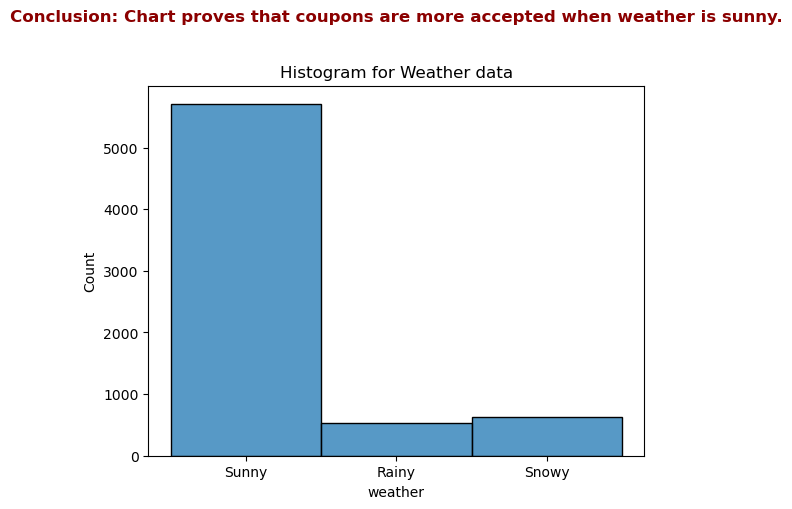

In [153]:
sns.histplot(data=data.query('Y == 1'), x="weather")
plt.title('Histogram for Weather data')
plt.savefig('images/hist_weather.png', bbox_inches='tight')  # bbox_inches avoids label cutoff
plt.text(
    x=1,                # x-coordinate (index of bar or numeric position)
    y=7000,              # y-coordinate (height position)
    s="Conclusion: Chart proves that coupons are more accepted when weather is sunny.",  # your conclusion
    fontsize=12,
    fontweight='bold',
    color='darkred',
    ha='center',        # horizontal alignment: left, right, or center
    va='bottom'         # vertical alignment
)
plt.show()